<a href="https://colab.research.google.com/github/sangjin94/itwill-python/blob/main/ml09_cancer_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import plot_roc_curve

# Binary-class Classification(이진 분류)

Breast cancer 데이터 셋에서 악성종양(malignant)/양성종양(benign) 분류

## 데이터 셋 준비

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
# 특성 행렬(2d array), 타겟 벡터(1d array)
X, y = cancer['data'], cancer['target']

In [ ]:
X.shape

(569, 30)

In [ ]:
y.shape

(569,)

In [ ]:
y[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [ ]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer['target_names']
#> 0: malignant(악성종양), 1: benign(양성종양)

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([42, 72]))

## KNN 분류기

In [ ]:
# 모델 생성
knn_model = Pipeline(steps=[('scaler', StandardScaler()),
                            ('clf', KNeighborsClassifier())])

In [ ]:
# 모델 훈련
knn_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
# 훈련 셋 평가
train_pred = knn_model.predict(X_train)
accuracy_score(y_train, train_pred)

0.9736263736263736

In [ ]:
confusion_matrix(y_train, train_pred)

array([[161,   9],
       [  3, 282]])

In [ ]:
precision_score(y_train, train_pred)

0.9690721649484536

In [ ]:
# 테스트 셋 평가
test_pred = knn_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.956140350877193

In [ ]:
confusion_matrix(y_test, test_pred)

array([[39,  3],
       [ 2, 70]])

In [ ]:
precision_score(y_test, test_pred)

0.958904109589041

**ROC(Receiver Operating Characteristic) Curve**

가짜 양성 비율(FPR: False Positve Rate)에 대한 진짜 양성 비율(TPR: True Positive Rate)의 곡선.

* 가짜 양성 비율(특이도 specificity): $ FPR = \dfrac{FP}{TN + FP} $
* 진짜 양성 비율(재현율 recall, 민감도 sensitivity): $ TPR = \dfrac{TP}{FN + TP} $
* **AUC(Area Under Curve)**: ROC curve의 아래쪽 면적
    * AUC가 1에 가까울 수록 좋은 모델
    

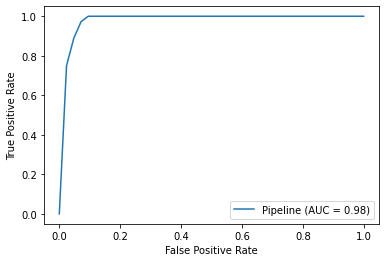

In [ ]:
plot_roc_curve(estimator=knn_model, X=X_test, y=y_test)
plt.show()

## LogisticRegression

In [ ]:
# 모델 생성
logit_model = Pipeline(steps=[('scaler', StandardScaler()),
                              ('clf', LogisticRegression(random_state=42))])

In [ ]:
# 모델 훈련
logit_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
# 훈련 셋 평가
train_pred = logit_model.predict(X_train)
accuracy_score(y_train, train_pred)

0.989010989010989

In [ ]:
confusion_matrix(y_train, train_pred)

array([[166,   4],
       [  1, 284]])

In [ ]:
# 테스트 셋 평가
test_pred = logit_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.9824561403508771

In [ ]:
confusion_matrix(y_test, test_pred)

array([[41,  1],
       [ 1, 71]])

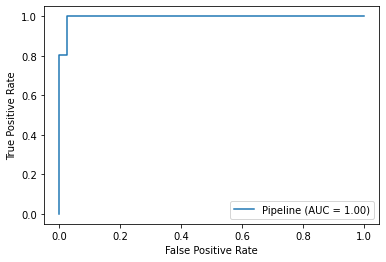

In [ ]:
# ROC curve
plot_roc_curve(logit_model, X_test, y_test)
plt.show()

## SGDClassifier

In [ ]:
# 모델 생성
sgd_model = Pipeline(steps=[('scaler', StandardScaler()),
                            ('clf', SGDClassifier(random_state=42))])

In [ ]:
# 모델 훈련
sgd_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=42,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
# 훈련 셋 평가
train_pred = sgd_model.predict(X_train)
accuracy_score(y_train, train_pred)

0.9824175824175824

In [ ]:
confusion_matrix(y_train, train_pred)

array([[165,   5],
       [  3, 282]])

In [ ]:
# 테스트 셋 평가
test_pred = sgd_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.9649122807017544

In [ ]:
confusion_matrix(y_test, test_pred)

array([[41,  1],
       [ 3, 69]])

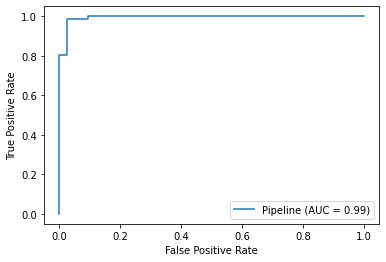

In [ ]:
plot_roc_curve(sgd_model, X_test, y_test)
plt.show()

# Multi-class Classification(다중 클래스 분류)

Iris 품종(setosa, versicolor, virginica) 분류

## 데이터 셋 준비

In [ ]:
iris = datasets.load_iris()

In [ ]:
# feature matrix, target vector
X, y = iris['data'], iris['target']

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

## KNN

In [ ]:
# 모델 생성
knn_model = Pipeline(steps=[('scaler', StandardScaler()),
                            ('clf', KNeighborsClassifier())])

In [ ]:
# 모델 훈련
knn_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [ ]:
# 훈련 셋에서의 예측 확률
train_proba = knn_model.predict_proba(X_train)
train_proba[:5]

array([[1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

In [ ]:
# 훈련 셋에서의 예측값
train_pred = knn_model.predict(X_train)
train_pred[:5]

array([0, 1, 1, 0, 1])

In [ ]:
# 훈련 셋 평가
accuracy_score(y_train, train_pred)

0.975

In [ ]:
confusion_matrix(y_train, train_pred)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

In [ ]:
# 테스트 셋 평가
test_pred = knn_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.9333333333333333

In [ ]:
confusion_matrix(y_test, test_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

## LogisticRegression

In [ ]:
# 모델 생성
logit_model = Pipeline(steps=[('scaler', StandardScaler()),
                              ('clf', LogisticRegression(random_state=42))])

In [ ]:
# 모델 훈련
logit_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
# 훈련 셋 예측 확률
train_proba = logit_model.predict_proba(X_train)
train_proba[:5]

array([[9.68620646e-01, 3.13787012e-02, 6.52846314e-07],
       [1.85788527e-02, 5.12851503e-01, 4.68569645e-01],
       [1.89364752e-03, 7.64384033e-01, 2.33722319e-01],
       [9.57062439e-01, 4.29369829e-02, 5.77906756e-07],
       [2.53065001e-02, 8.96861717e-01, 7.78317827e-02]])

In [ ]:
# 훈련 셋 예측값
train_pred = logit_model.predict(X_train)
train_pred[:5]

array([0, 1, 1, 0, 1])

In [ ]:
accuracy_score(y_train, train_pred)

0.9583333333333334

In [ ]:
confusion_matrix(y_train, train_pred)

array([[40,  0,  0],
       [ 0, 38,  2],
       [ 0,  3, 37]])

In [ ]:
# 테스트 평가
test_pred = logit_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.9333333333333333

In [ ]:
confusion_matrix(y_test, test_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

## SGDClassifier

In [ ]:
# 모델 생성
sgd_model = Pipeline(steps=[('scaler', StandardScaler()),
                            ('clf', SGDClassifier(random_state=42))])

In [ ]:
# 모델 훈련
sgd_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=42,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
# 훈련 셋 평가
train_pred = sgd_model.predict(X_train)
accuracy_score(y_train, train_pred)

0.95

In [ ]:
confusion_matrix(y_train, train_pred)

array([[40,  0,  0],
       [ 1, 35,  4],
       [ 0,  1, 39]])

In [ ]:
# 테스트 셋 평가
test_pred = sgd_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.9333333333333333

In [ ]:
confusion_matrix(y_test, test_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])